## UCI SECOM Dataset
### Semiconductor manufacturing process dataset

##### Manufacturing process feature selection and categorization
What we will do in this notebook? 
#### In this Notebook we will do the training and testing pipeline. Later we will make a pipeline with .py depending on each step

##### Our goal is to correctly classify input signals to pass or fail. We specifically going to create a classifier and test it.

data source: https://www.kaggle.com/datasets/paresh2047/uci-semcom?resource=download

1) Imports

In [1]:
# Libraries

import imp
import numpy as np
import pandas as pd


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

#boto3
#import boto3



In [2]:
#aws and boto3

#session = boto3.Session(profile_name='default')
#s3_client = session.client('s3')

In [44]:
#Mlflow
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
#mlflow.set_experiment("testing-mlflow")
mlflow.create_experiment("semicon-sensor-clf7","s3://mlflow-semicon-clf/")
mlflow.set_experiment("semicon-sensor-clf7")

<Experiment: artifact_location='s3://mlflow-semicon-clf/', experiment_id='7', lifecycle_stage='active', name='semicon-sensor-clf7', tags={}>

In [26]:
# Data 

df = pd.read_csv('.\\data\\uci-secom.csv',delimiter=',')
df = df.drop("Unnamed: 0", axis=1, inplace=False)


## 1) Data understanding

In [30]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [31]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [32]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

It appears that there are 104 fail instances and 1463 pass instances. (Pretty imbalanced)

Imbalanced not only in the target data column but also regading the number of features. 

Take a look:

In [33]:
len(df.columns)

592

There are in total 591 features (sensors)  (592 minus the pass/fail column)

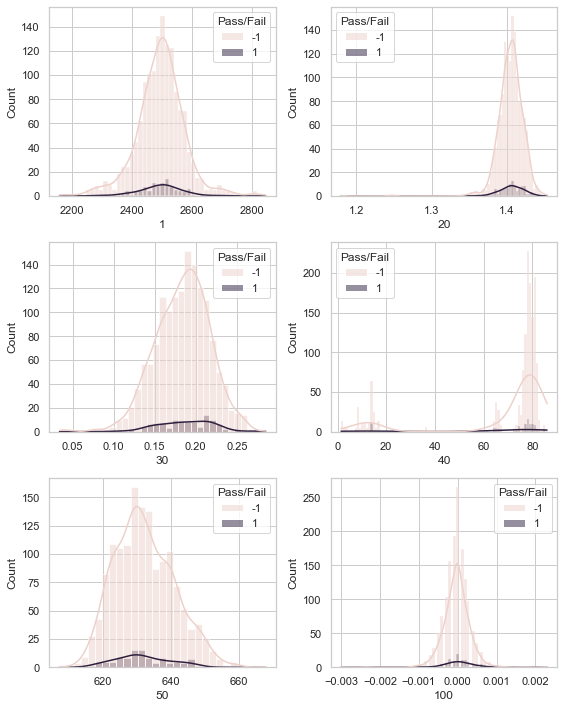

In [34]:
# lets plot some of the features

sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=df, x='1', kde=True,hue='Pass/Fail', ax=axs[0, 0])
sns.histplot(data=df, x='20', kde=True,hue='Pass/Fail', ax=axs[0, 1])
sns.histplot(data=df, x='30', kde=True,hue='Pass/Fail', ax=axs[1, 0])
sns.histplot(data=df, x='40', kde=True,hue='Pass/Fail', ax=axs[1, 1])
sns.histplot(data=df, x='50', kde=True,hue='Pass/Fail', ax=axs[2, 0])
sns.histplot(data=df, x='100', kde=True,hue='Pass/Fail', ax=axs[2, 1])
fig.tight_layout()


In [11]:
# In this random sample 5 are very close to a normal distirbution while one has some outliers. 

# Also the fails are not in the outliers of the feature 40. (We are not lucky or this problem obviously is not that straightforward)

## 2) Data processing

In [35]:
100*df.isnull().sum().sum()/(df.shape[0]*df.shape[1]) #percentage of missing values

4.522219251798065

In [36]:
#find correlations


In [46]:
#under sample data

# class count
class_count_0, class_count_1 = df['Pass/Fail'].value_counts()

# Separate class
class_0 = df[df['Pass/Fail'] == -1]
class_1 = df[df['Pass/Fail'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (1463, 592)
class 1: (104, 592)


total class of 1 and 0: -1    416
 1    104
Name: Pass/Fail, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

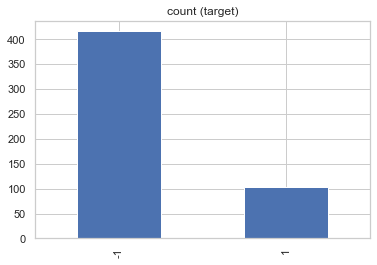

In [47]:
class_0_under = class_0.sample(class_count_1*4)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Pass/Fail'].value_counts())# plot the count after under-sampeling
test_under['Pass/Fail'].value_counts().plot(kind='bar', title='count (target)')

In [48]:
#split data
from sklearn.preprocessing import LabelEncoder

#without reduced data
#X = df.drop(['Pass/Fail','Time'], axis=1)
#y = df['Pass/Fail']

#with reduced data
#first reduce data positives
X = test_under.drop(['Pass/Fail','Time'], axis=1)
y = test_under['Pass/Fail']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.15)

In [17]:
# cleaning method mean


imp_mean = SimpleImputer( strategy='median') #for median imputation replace 'mean' with 'median'
imp_mean.fit(X_train) #need to save this for later

#transform data  (fill nans)
X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)


In [18]:
# scale data

# Standardizing the features
sc = StandardScaler().fit(X_train)

#transform data  (scale data)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [19]:
#Use PCA

pca = PCA(n_components=15)
pca_tr = pca.fit(X_train)

#transform data  (PCA)
X_train = pca_tr.transform(X_train)
X_test = pca_tr.transform(X_test)

X_train = pd.DataFrame(data = X_train)
X_test = pd.DataFrame(data = X_test)

## 3) Training and testing

In [40]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    color = 'white'
    matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    matrix.ax_.set_title('Confusion Matrix', color=color)
    plt.xlabel('Predicted Label', color=color)
    plt.ylabel('True Label', color=color)
    plt.gcf().axes[0].tick_params(colors=color)
    plt.gcf().axes[1].tick_params(colors=color)
    plt.show()

Random forest
clf = RandomForestClassifier(max_depth=19,random_state=0,class_weight={0:1,1:8})
clf.fit(X_train, y_train)

test
y_pred = clf.predict(X_test)

compute accuracy of the model
clf.score(X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test,y_pred)

#XGBoost

from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

with mlflow.start_run():
    sample_weights_xgb = compute_sample_weight(
        class_weight='balanced',
        y=y_train #provide your own target name
    )
    
    params = {"learning_rate": 0.03, "n_estimators": 200, "max_depth": 10}
    


    #fit 
    xgb_classifier = XGBClassifier(params)
    xgb_classifier.fit(X_train, y_train, sample_weight=sample_weights_xgb)
    
    #test
    y_pred = xgb_classifier.predict(X_test)

    #compute accuracy of the model
    score = xgb_classifier.score(X_test, y_test)
    
    print(score)

    #mlflow
    mlflow.set_tag("Data Scientist,Astellas")
    mlflow.log_params(params)
    mlflow.xgboost.log_model(xgb_classifier)
    mlflow.log_metric("score", score)

In [49]:
#sklearn pipeline

pipeline = make_pipeline(
SimpleImputer( strategy='median')
,StandardScaler()
,PCA(n_components=15)
,KNeighborsClassifier(n_neighbors=3))

In [50]:
pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=15)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [51]:

with mlflow.start_run():

    params = {"n_neighbors": 3}
    
    pipeline.fit(X_train, y_train)
    
    # test
    y_pred = pipeline.predict(X_test)

    # compute accuracy of the model
    score = pipeline.score(X_test, y_test)
    print(score)

    # mlflow
    mlflow.set_tag("Data Scientist","Astellas")
    mlflow.log_params(params)
    mlflow.sklearn.log_model(pipeline,"artifacts")
    mlflow.log_metric("score", score)


Exception: Run with UUID 27e079d9c71f4c05a2493c9c492630a8 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

c:\Users\AX-St\.virtualenvs\Mlops_project_semicon-RaORYTdD\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\AX-St\.virtualenvs\Mlops_project_semicon-RaORYTdD\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


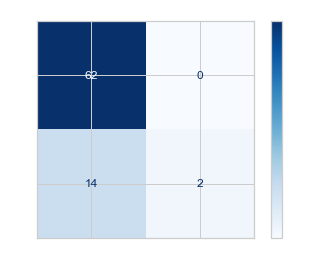

In [114]:
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [41]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        62
           1       0.20      0.06      0.10        16

    accuracy                           0.76        78
   macro avg       0.50      0.50      0.48        78
weighted avg       0.67      0.76      0.70        78



In [57]:
X_test.to_pickle('./data/input_test.pkl')

In [91]:
pd.read_pickle('./data/input_test.pkl')

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
611,2967.54,2573.09,2160.6000,1124.5821,1.5257,100.0,98.7122,0.1246,1.4750,0.0248,...,NaN,NaN,0.4973,0.0129,0.0030,2.6016,0.0252,0.0157,0.0046,62.3881
214,3075.76,2491.55,2185.9333,1659.6962,1.6290,100.0,98.6822,0.1227,1.4510,-0.0129,...,NaN,NaN,0.4968,0.0115,0.0032,2.3200,0.0298,0.0116,0.0039,38.9781
1271,3024.55,2423.98,2255.5222,1763.0739,1.2226,100.0,101.5878,0.1200,1.5666,-0.0115,...,NaN,NaN,0.5010,0.0202,0.0045,4.0313,0.0184,0.0148,0.0054,80.1759
926,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,0.0071,...,NaN,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176
227,3109.02,2472.13,2197.6444,1247.0334,0.7865,100.0,99.9211,0.1203,1.4406,0.0156,...,0.0041,44.1766,0.4999,0.0102,0.0029,2.0404,0.0327,0.0144,0.0041,44.1766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2965.48,2467.94,2178.6889,1657.3518,1.6603,100.0,100.8022,0.1229,1.5611,0.0128,...,0.0056,43.1616,0.5008,0.0109,0.0029,2.1758,0.0433,0.0187,0.0056,43.1616
140,3001.41,2581.07,2224.4778,994.9032,1.2834,100.0,101.8267,0.1191,1.5668,-0.0074,...,NaN,NaN,0.5027,0.0165,0.0038,3.2844,0.0058,0.0169,0.0060,289.9234
473,3038.93,2187.67,2219.1333,1167.9207,0.9002,100.0,97.9378,0.1203,1.4144,-0.0061,...,NaN,NaN,0.5031,0.0127,0.0030,2.5288,0.0189,0.0072,0.0023,37.8921
578,2898.08,2573.36,2159.0556,1084.3779,0.8184,100.0,100.7056,0.1249,1.4981,0.0022,...,NaN,NaN,0.4963,0.0150,0.0037,3.0266,0.0182,0.0139,0.0039,76.6094


In [30]:
df.head(20).to_csv('./tests/sample_test_data.csv')

In [17]:
len(df.columns)

593

In [28]:
df[df['Pass/Fail'] == 1]

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
10,2008-07-19 21:57:00,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,0.1223,1.5144,...,57.8122,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122,1
11,2008-07-19 22:52:00,2928.84,2479.40,2196.2111,1605.7578,0.9959,100.0,97.9156,0.1257,1.4690,...,75.5077,0.4987,0.0427,0.0092,8.5646,0.0370,0.0279,0.0081,75.5077,1
14,2008-07-21 11:53:00,2963.97,2629.48,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.4474,...,142.9080,0.5077,0.0094,0.0026,1.8483,0.0202,0.0289,0.0084,142.9080,1
23,2008-07-25 15:23:00,2884.74,2514.54,2160.3667,899.9488,1.4022,100.0,105.4978,0.1240,1.5585,...,216.8869,0.4982,0.0099,0.0027,1.9771,0.0098,0.0213,0.0077,216.8869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2008-06-10 15:00:00,2988.39,2493.72,2206.4000,982.5452,1.1853,100.0,116.8167,0.1228,1.5279,...,0.0000,0.4972,0.0154,0.0035,3.0992,-0.0006,0.0118,0.0039,0.0000,1
1400,2008-07-10 13:10:00,3052.98,2515.51,2172.8111,969.3436,1.2736,100.0,102.7367,0.1243,1.4065,...,52.7014,0.5081,0.0158,0.0037,3.1106,0.0302,0.0159,0.0059,52.7014,1
1438,2008-09-10 04:34:00,2951.84,2477.13,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.4613,...,NaN,0.4969,0.0118,0.0037,2.3773,0.0178,0.0120,0.0038,67.7994,1
1443,2008-09-10 15:55:00,3173.18,2428.64,2209.4667,1556.3930,1.4884,100.0,95.1156,0.1206,1.6073,...,88.1528,0.5021,0.0192,0.0041,3.8289,0.0281,0.0247,0.0075,88.1528,1
